## Human Pose Estimation with Keypoint detection

Pose 는 face landmark 랑 비슷하다.
- 하지만 난이도에서 차이가 난다.
- face landmark 는 물리적으로 거의 고정되어 있는 반면, human pose 는 팔, 다리가 상대적으로 넓은 범위와 자유도를 갖는다는 것을 고려해야 한다.

가장 초기에 만나는 접근법은 두 가지로 나눠질 수 있다.

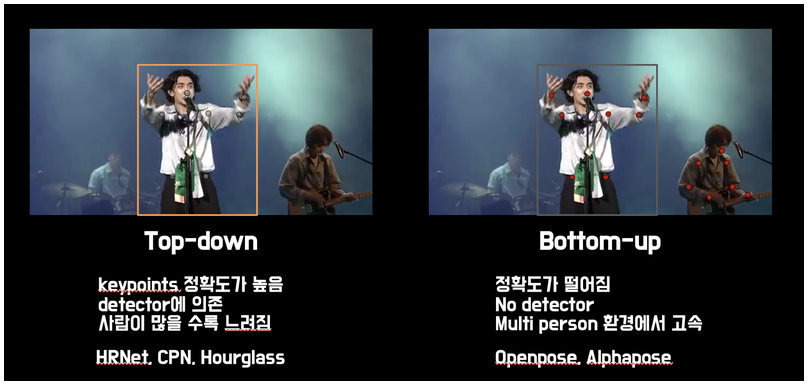

In [1]:
from IPython.display import Image
Image(filename='capture/top-down_bottom-up.png') 

- Top-down 방법
  - 모든 사람의 정확한 keypoint 를 찾기 위해 object detection 을 사용
  - crop 한 이미지 내에서 keypoint 를 찾아내는 방법으로 표현
  - detector가 선행되어야 하고 모든 사람마다 알고리즘을 적용해야 하기 때문에 사람이 많이 등장할 때는 느리다는 단점이 있음
- Bottom-up 방법
  - detector가 없고 keypoint 를 먼저 검출
  - 한 사람에 해당하는 keypoint 를 clustering
  - detector 가 없기 때문에 다수의 사람이 영상에 등장하더라도 속도 저하가 크지 않다.
  - 반면 top down 방식에 비해 keypoint 검출 범위가 넓어 성능이 떨어진다는 단점이 있음

딥러닝 기반 방법이 적용되기 전에는 다양한 사전 지식이 사용되었다.  
가장 기본이 되는 아이디어는 "인체는 변형 가능 부분으로 나누어져 있고 각 부분끼리 연결성을 가지고 있다." 는 것이었다.

3D 환경에서 생각하면 정말 좋은 방법일 수 있다.  
하지만 우리가 다루는 데이터는 2D 이미지 데이터이기 때문에 촬영 각도에 따라 충분히 팔이 다리 옆에서 관찰될 수 있다.

### DeepPose

Toshev and Szegedy 는 처음으로 딥러닝 기반 keypoint localization 모델을 제안함
- 기존 기술로는 풀기 어려웠던 동작의 다양성, invisible joint 의 문제를 언급하며 딥러닝 기반 추론 방법이 해결책이 될 수 있다는 것을 증명해냄.
- https://arxiv.org/pdf/1312.4659.pdf 참고

초기의 pose estimation 모델은 x,y 좌표를 직접적으로 예측하는 position regression 문제로 인식했다.  
human detection 을 통한 crop 된 사람 이미지를 이용해서 딥러닝 모델에 입력하고 (x,y) 좌표를 출력하도록 만들었다.

DeepPose는 매우 혁신적인 시도였던 것에 비해 사실 성능이 압도적으로 높았던 것은 아니었다.

DeepPose 의 기여는 SOTA에 가까운 성능을 내면서도 딥러닝을 적용한 첫 번째 사례라고 할 수 있겠다.

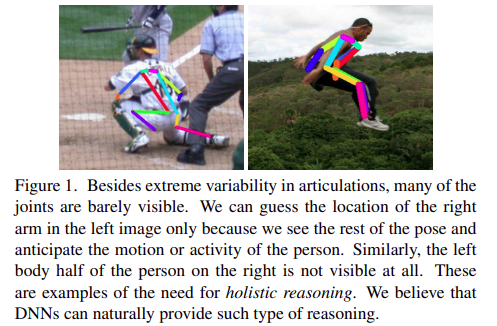

In [2]:
from IPython.display import Image
Image(filename='capture/deep-pose.png') 

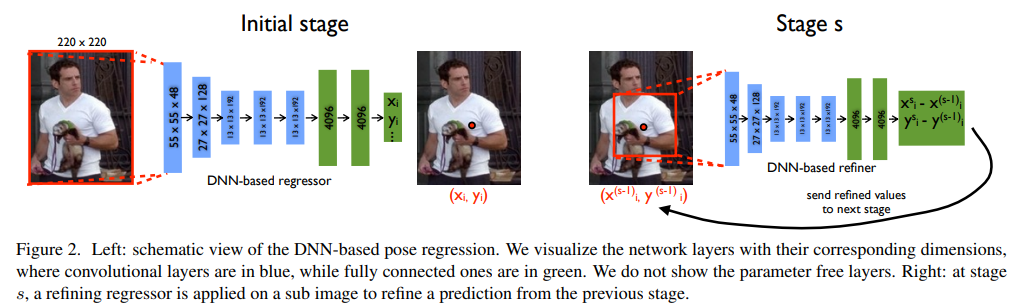

In [3]:
from IPython.display import Image
Image(filename='capture/deep-pose_stage.png') 

### Efficient Object Localization Using Convolutional Network

이 논문에서는 제안했던 모델도 DeepPose 에 비해 깊어졌지만,  
가장 중요한 건 keypoint의 위치를 직접 예측하기보다 keypoint가 존재할 확률 분포를 학습하게 하자는 점이다.
- https://arxiv.org/pdf/1411.4280.pdf 참고

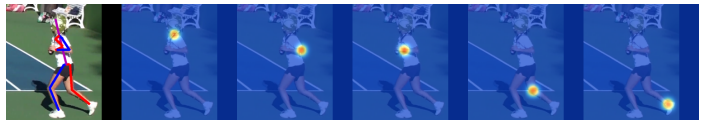

In [4]:
from IPython.display import Image
Image(filename='capture/efficient_object_localization.png') 

### MPII 데이터셋

MPII 데이터는 2014년에 나온 데이터
- 기존 FLIC 데이터가 머리, 어깨, 팔꿈치, 손목 수준의 적은 개수의 keypoint를 가지고 있었지만
- MPII는 몸의 각 관절 부위 16개의 keypoint를 갖는다.
- http://human-pose.mpi-inf.mpg.de/ 참고

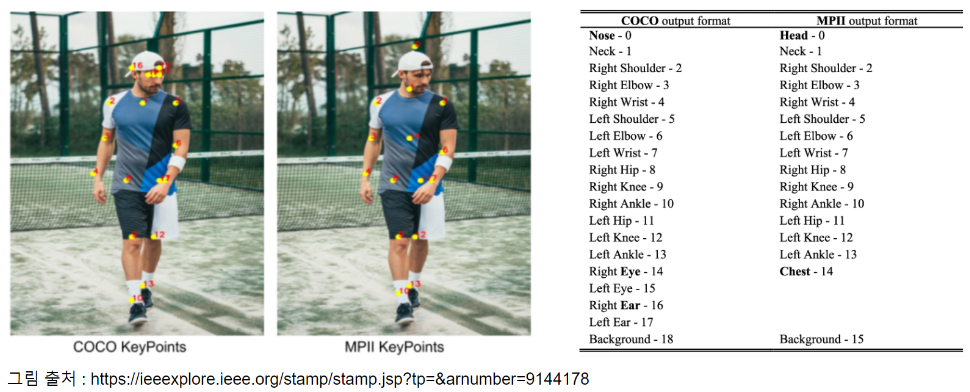

In [9]:
from IPython.display import Image
Image(filename='capture/MPII.png') 

### Convolutional Pose Machines (CPM)

CVPR 2016에서 발표된 CPM 은 completely differentiable 한 multi-stage 구조를 제안함

CPM 은 end-to-end 로 학습할 수 있는 모델을 제안함
- Stage 1 은 image feature 를 계산하는 역할을 하고 stage 2는 keypoint 를 예측하는 역할을 한다.
- g1과 g2 모두 heatmap 을 출력하게 만들어서 재사용이 가능한 부분은 weight sharing 할 수 있도록 세부 모델을 설계했다.

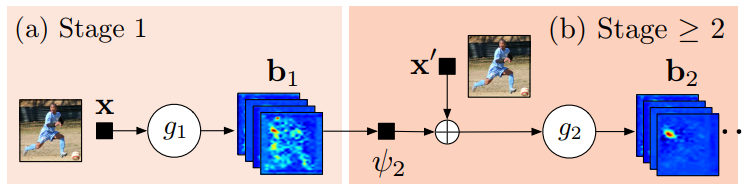

In [5]:
from IPython.display import Image
Image(filename='capture/cpm_1.png') 

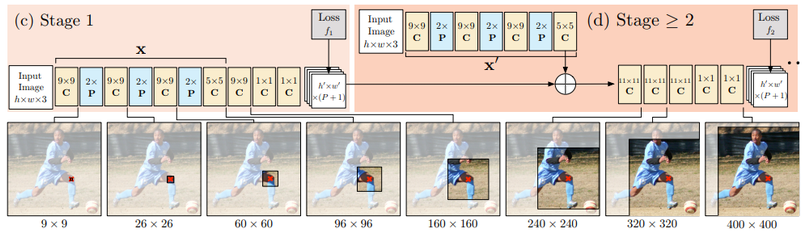

In [6]:
from IPython.display import Image
Image(filename='capture/cpm_2.png') 

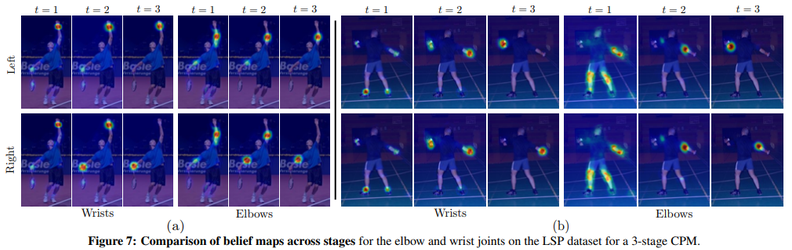

In [7]:
from IPython.display import Image
Image(filename='capture/cpm_3.png') 

CPM 을 다루는 이유는 성능 때문이다.

receptive field 를 넓게 만드는 multi stage refinement 방법이 성능 향상에 크게 기여한 것 같다.

### Stacked Hourglass Network

ECCV16 에서는 DeepPose 이후 랜드마크라고 불릴만한 논문이 제안되었다.

바로 Stacked Hourglass Networks for Human Pose Estimation 이다.
- https://arxiv.org/pdf/1603.06937.pdf 참고

#### Hourglass

Stacked Hourglass Network 의 기본 구조는 모래시계 같은 모양으로 만들어져 있다. 

Conv layer 와 pooling 으로 이미지(또는 feature) 를 인코딩 하고 upsampling layer 를 통해 feature map 의 크기를 키우는 방향으로 decoding 한다.  
feature map 크기가 작아졌다 커지는 구조여서 hourglass 라고 표현한다.

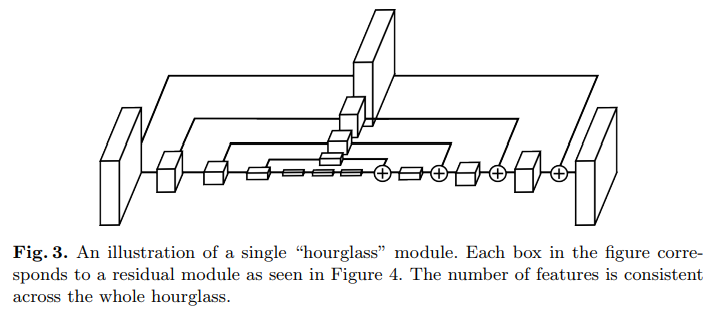

In [8]:
from IPython.display import Image
Image(filename='capture/hourglass.png') 

기존 방법들과의 가장 큰 차이점은
- feature map upsampling
- residual connection

### SimpleBaseline

앞서 소개해드린 연구들은 딥러닝 기반의 2D human pose estimation 이 어떻게 발전해 왔는지 보여주고 있다.  
(x, y) 를 직접 regression 하는 방법이 heatmap 기반으로 바뀌고 모델의 구조가 바뀌어 가면서 encoder-decoder 가 쌓아져 가는 형태가 완성되었다.

결과적으로 MPII 에서 90% 를 넘길 정도로 좋아졌지만 모델의 구조는 다소 복잡해졌다.  
(사실 2020년 최신 논문들에 비하면 크게 복잡한 정도는 아니지만.. 18~19년 당시의 기준이다.)

HPE 의 연구를 쭉 따라오던 당시 Microsoft 인턴 Haiping Wu는 약간 다른 시각을 가져봤다.
- "기술 자체가 많이 발전했는데 현재의 간단한 모델은 얼마나 성능이 좋을까?"

SimpleBaseline의 저자는 정말 아주 간단한 encoder-decoder 구조를 설계했다.
- https://arxiv.org/pdf/1804.06208.pdf 참고

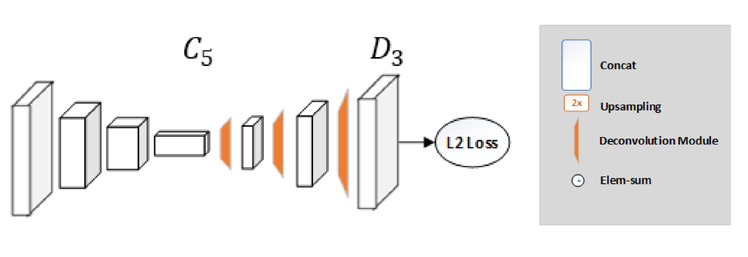

In [10]:
from IPython.display import Image
Image(filename='capture/simplebaseline.png') 

hourglass 와 비교해본 결과

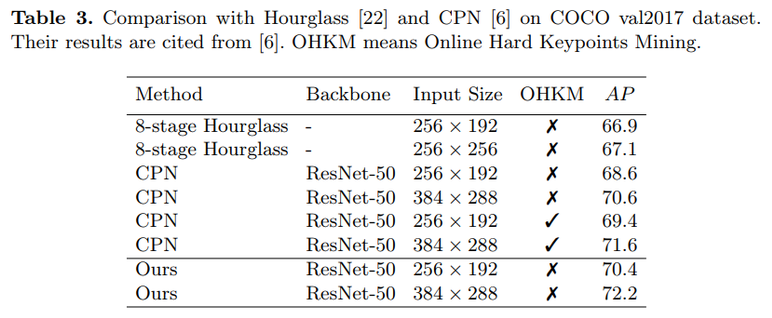

In [11]:
from IPython.display import Image
Image(filename='capture/simplebaseline_compare_to_hourglass.png') 

### Deep High-Resolution Network (HRNet)

HRNet 은 개발된 이후 현재까지도 SOTA 에 가까운 성능을 보일 정도로 성능이 좋은 알고리즘이다.
- https://arxiv.org/pdf/1902.09212.pdf 참고

기존 Stacked hourglass, Casecaded pyramid netwokr (CPN) 등은 multi-stage 구조라서 학습&추론 속도가 느리다는 단점.  
반면 Simplebaseline 과 HRNet 은 간단함을 추구하는 만큼 1-stage 를 고수한다. 덕분에 간결해지고 사용하기도 쉽다.

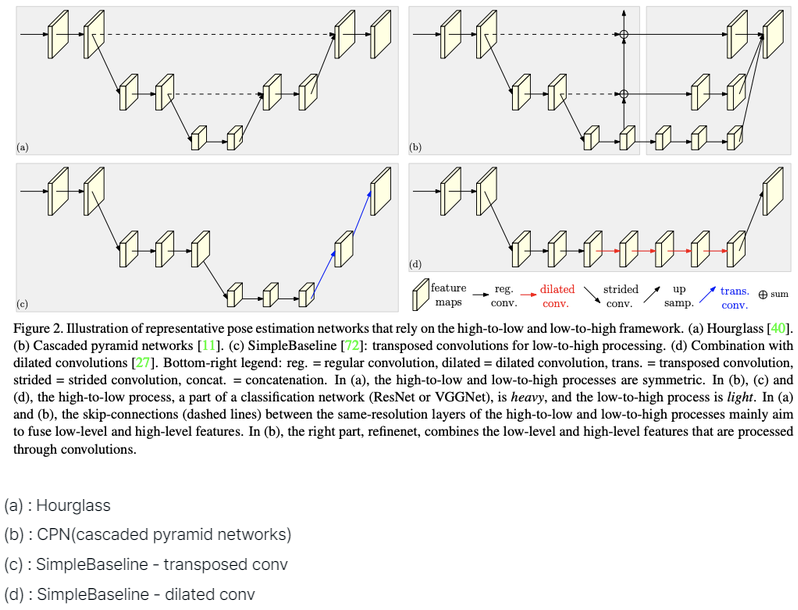

In [12]:
from IPython.display import Image
Image(filename='capture/illustration_of_pose_estimation_networks.png') 

https://github.com/leoxiaobin/deep-high-resolution-net.pytorch 참고

### 코드 읽어보기

https://github.com/Microsoft/human-pose-estimation.pytorch 참고

In [23]:
import os

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

resnet = tf.keras.applications.resnet.ResNet50(include_top=False, weights='imagenet')

# https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5 다운로드
#resnet = tf.keras.applications.resnet.ResNet50(include_top=False)
#resnet = resnet.load_weights('./checkpoint/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')

deconv module 만들기

In [24]:
upconv1 = tf.keras.layers.Conv2DTranspose(256, kernel_size=(4,4), strides=(2,2), padding='same')
bn1 = tf.keras.layers.BatchNormalization()
relu1 = tf.keras.layers.ReLU()
upconv2 = tf.keras.layers.Conv2DTranspose(256, kernel_size=(4,4), strides=(2,2), padding='same')
bn2 = tf.keras.layers.BatchNormalization()
relu2 = tf.keras.layers.ReLU()
upconv3 = tf.keras.layers.Conv2DTranspose(256, kernel_size=(4,4), strides=(2,2), padding='same')
bn3 = tf.keras.layers.BatchNormalization()
relu3 = tf.keras.layers.ReLU()

deconv module 만들기 (위 코드를 함수로)

In [25]:
def _make_deconv_layer(num_deconv_layers):
    seq_model = tf.keras.models.Sequential()
    for i in range(num_deconv_layers):
        seq_model.add(tf.keras.layers.Conv2DTranspose(256, kernel_size=(4,4), strides=(2,2), padding='same'))
        seq_model.add(tf.keras.layers.BatchNormalization())
        seq_model.add(tf.keras.layers.ReLU())
    return seq_model

upconv = _make_deconv_layer(3)

In [26]:
final_layer = tf.keras.layers.Conv2D(17, kernel_size=(1,1), padding='same')

이제 각각의 요소를 합쳐 모델을 완성

In [27]:
inputs = keras.Input(shape=(256, 192, 3))
x = resnet(inputs)
x = upconv(x)
out = final_layer(x)
model = keras.Model(inputs, out)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 192, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 sequential_1 (Sequential)   (None, 64, 48, 256)       10489600  
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 48, 17)        4369      
                                                                 
Total params: 34,081,681
Trainable params: 34,027,025
Non-trainable params: 54,656
_________________________________________________________________


가상의 이미지를 넣어서 출력이 잘 나오는지 확인하는 코드를 작성

In [28]:
np_input = np.zeros((1,256,192,3), dtype=np.float32)
tf_input = tf.convert_to_tensor(np_input, dtype=tf.float32)
print('input shape')
print (tf_input.shape)
print('\n')

tf_output = model(tf_input)
print('output shape')
print (tf_output.shape)
print (tf_output[0,:10,:10,:10])

input shape
(1, 256, 192, 3)




2022-09-15 16:18:21.814343: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401


output shape
(1, 64, 48, 17)
tf.Tensor(
[[[-2.28011562e-03 -4.46690153e-03  6.61511766e-03 -2.43310351e-03
    2.71100039e-03  2.56076758e-03 -3.14451521e-03  3.68817477e-04
   -7.37928972e-03 -1.30771333e-03]
  [-5.57089318e-03  7.41714472e-03 -6.35445863e-03 -1.84355490e-03
   -4.99721663e-03  6.48575975e-03  1.16009265e-04 -1.75462523e-03
   -1.87680218e-02 -3.06577515e-03]
  [-1.44652836e-03  1.48273269e-02  4.86344378e-03  1.13512836e-02
   -7.15193199e-03  1.20326914e-02 -9.09690186e-03 -1.99660892e-03
   -1.12557104e-02  4.18765936e-04]
  [-7.35429768e-03  9.64847486e-03 -4.41182638e-04  1.16015524e-02
   -2.04725377e-03  1.79812759e-02  1.02109173e-02  6.60094433e-03
    2.78416928e-03 -1.26422290e-02]
  [ 2.31945887e-06  5.20267850e-03  1.11177918e-02 -5.71165700e-03
   -4.43696044e-03  1.24619659e-02 -5.56780072e-03  1.27012338e-02
   -9.61527415e-03  4.49487567e-03]
  [-1.70494467e-02  9.36545432e-04 -8.52895528e-03  1.01863630e-02
    1.12275183e-02  4.85878112e-03 -6.12386